## Review on basic Python data visualziation and data summary 

### Goal for today： 

- Review on basic data structure
- Understand basic rules to choose figure type
- Learn how to describe data and simple figures 
- Review basic plotting options in Python (matplotlib and seaborn)


### Describing a data set

In a data table (also called ``data matrix"), like the one below. There are two dimensions in the data: 

- Observations: each individual subject, case, or sample point (rows, represented with $n$)
- Variables/Feature: characteristics that are recorded for each subject in the sample (columns, represented with $p$)


In [3]:
import pandas as pd

df = pd.read_csv("ICUAdmissions.csv")
print(df.head())

   ID  Status  Age  Sex  Race  Service  Cancer  Renal  Infection  CPR  ...  \
0   8       0   27    1     1        0       0      0          1    0  ...   
1  12       0   59    0     1        0       0      0          0    0  ...   
2  14       0   77    0     1        1       0      0          0    0  ...   
3  28       0   54    0     1        0       0      0          1    0  ...   
4  32       0   87    1     1        1       0      0          1    0  ...   

   HeartRate  Previous  Type  Fracture  PO2  PH  PCO2  Bicarbonate  \
0         88         0     1         0    0   0     0            0   
1         80         1     1         0    0   0     0            0   
2         70         0     0         0    0   0     0            0   
3        103         0     1         1    0   0     0            0   
4        154         1     1         0    0   0     0            0   

   Creatinine  Consciousness  
0           0              1  
1           0              1  
2           0    

### Describing variables

There are at least two ways to describe variables:
		
By value type:
		
- Numerical variables: take on numerical values with meaning Mathematical operations like addition, etc. must make sense
- Categorical variables: take on names, categories, or labels Categories are sometimes represented by numbers...

By function:
		
- Response variable/Target: defined by the particular research question a study seeks to address, and measures the outcome of interest in the study
- Explanatory variable/Feature: a secondary variable(s) that explains changes in the response variable

### Important terminology clarification

- feature
- variable
- attribute

### In-class activities

Suppose my research question is "What factors may be related to the heart rate in ICU admissions?" Try to make three data viasualizations. 

Things you need to decide: 
- What features I want to choose for the data visualizaiton?
- What type of figures I will choose? 
- What information I want to achieve from the data visualization?
- ......


In [7]:
# Example 1: a distribution about the target value (heart rate)

In [8]:
# Example 2: scatter plot between heart rate vs. something
# "something" can be either 1. the variable you believe is important
#                           2. the variable that gives you a trend in the data

In [9]:
# Example 3: same as example 2 

### Basic data visualization choices

Here is a general guidline for the type of plots: 

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot (sankey diagram and treemap)- 

#### One categorical: bar plot

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

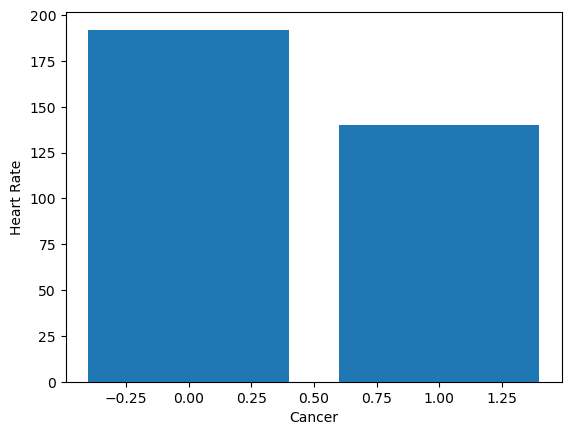

In [13]:
plt.bar(df["Cancer"], df["HeartRate"])
plt.xlabel("Cancer")
plt.ylabel("Heart Rate")
plt.show()

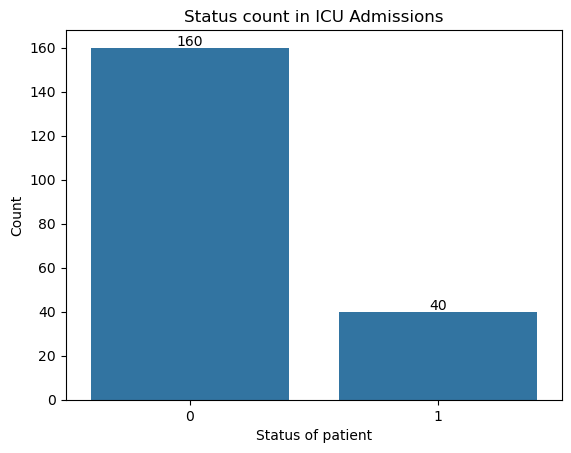

In [14]:
sns.countplot(x = "Status", data = df)
plt.xlabel("Status of patient")
plt.ylabel("Count")
plt.title("Status count in ICU Admissions")
status_counts = df["Status"].value_counts()

for i, value in enumerate(status_counts.values):
    plt.text(i, value+1, f'{value}', ha = 'center')

plt.show()

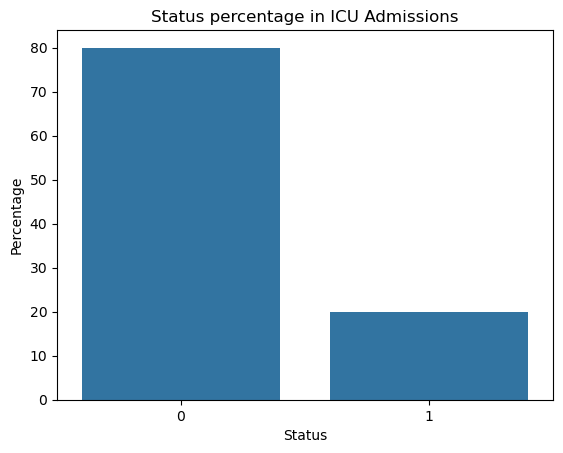

In [15]:
status_counts = df['Status'].value_counts(normalize = True)*100
status_counts

sns.barplot(x = status_counts.index, y = status_counts.values)
plt.xlabel("Status")
plt.ylabel("Percentage")
plt.title("Status percentage in ICU Admissions")
plt.show()

##### What to write about a bar plot

- what this plot is about? (what feature?)
- percentage/count for each group
- whether there is a clear difference on the percentage/count


  The figure above is about the number of people that survive in ICU Admissions. Status '0' means that patient
  has survived in the ICU while status '1' means the patient died in the ICU. Among the 200 patients, 160 (80%)
  of them survived, while 40 (20%) of them died.


#### One continous: histogram/density plot/boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

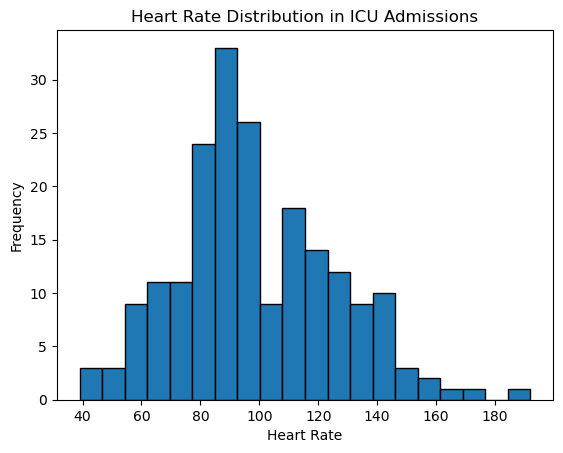

In [18]:
plt.hist(df['HeartRate'], bins = 20, edgecolor = 'black')
plt.xlabel("Heart Rate")
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

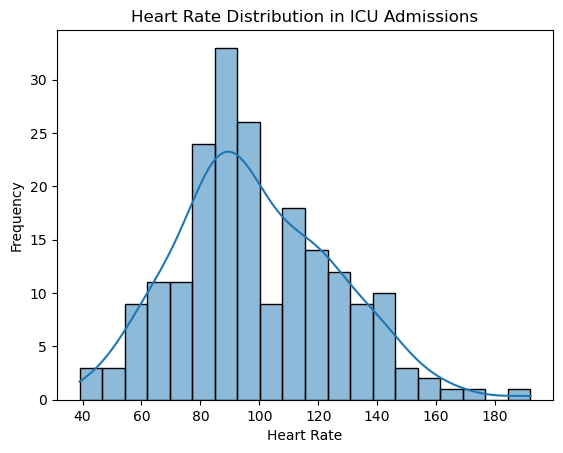

In [19]:
# using sns means you can have a density line
sns.histplot(df["HeartRate"], kde= True, bins = 20)
plt.xlabel("Heart Rate")
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

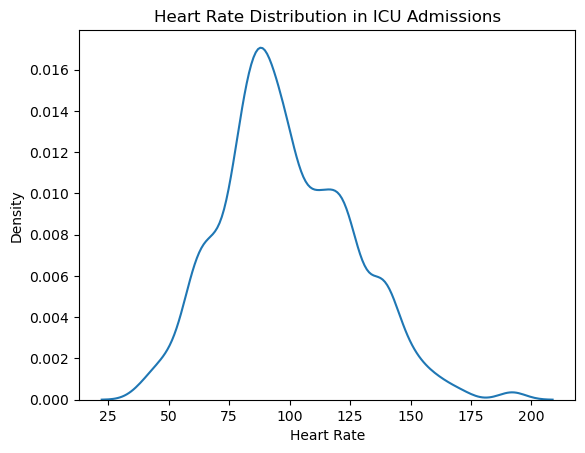

In [20]:
# you can also have a graph that only shows the density line
# you can change the bandwidth
sns.kdeplot(df["HeartRate"], bw_adjust = 0.6)
plt.xlabel("Heart Rate")
plt.ylabel('Density')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show

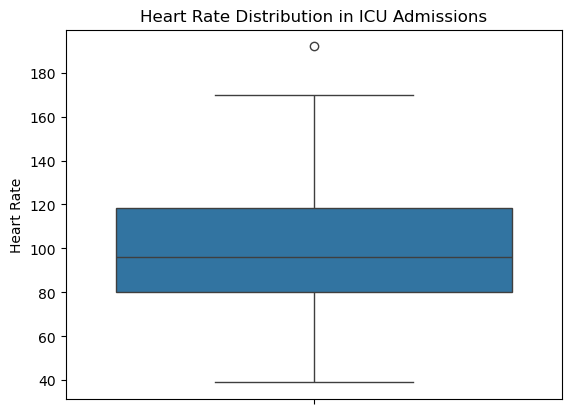

In [21]:
sns.boxplot(y = "HeartRate", data = df)
plt.ylabel("Heart Rate")
plt.title("Heart Rate Distribution in ICU Admissions")
plt.show()

In [22]:
df["HeartRate"].describe() #box plot statistics

count    200.00000
mean      98.92500
std       26.82962
min       39.00000
25%       80.00000
50%       96.00000
75%      118.25000
max      192.00000
Name: HeartRate, dtype: float64

##### Difference between histogram/density plot/ boxplot

- histogram and desntiy plot emphasizes the distrubtion of the data
- boxplot emphasizes on the statistics of the data (median, IQR)
- boxplot cannot catch the distribtion information (bimodal)
- histogram needs to choose the bin number and density plot needs to choose the bandwidth
- if you have multiple groups, boxplot and density plot can show the things side by side, histogram is hard for this

##### Difference between histogram and bar plot

- histogram is for numerical data and bar plot if for categorical data
- histogram is almost always vertical while bar plot can be horizontal
- histogram has no spaces between bars, while bar plot does


##### What to write about a histogram/density plot

- what the plot is about
- shape (skewness and mode)
- majority of the data (typical value)

<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="700" height="300">

example description of above histogram

The figure is about the distribution of heart rate among ICU admissions. The heart rate has uni-modal distribution
and it is slightly skewed to the right (positively skewed), which means it may have a potential outlier with
large values. The typical value is within the range of 98.9 $\pm$ 26.8.

##### What to write about a box plot

- what the plot is about
- can comment on skewnes but not mode
- majority of data (IQR)
- potential outliers

example:
The figure is the boxplot of the heart rate distribution in ICU admissions. It seems that the distribution is slightly
skewed to the right and it may have a potential outlier with alrge values. the IQR range is 80 to 118.25

#### Two continous: scatter plot

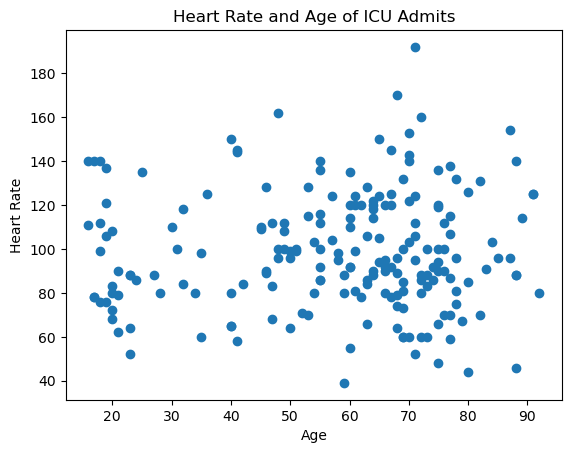

In [30]:
plt.scatter(df["Age"], df["HeartRate"])
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.title("Heart Rate and Age of ICU Admits")
plt.show()

##### What to write about a scatter plot

- what the plot is about
- identify trend (linear or nonlinear)
- outlier or cluster?

Example:
The figure shows the relationship between age and heart rate among ICU admissions. There is no 
clear linear or nonlinear trend in the figure and there is no clear outliers. There might be a
cluster for the ages 60-80 and the heart rate 100-120.

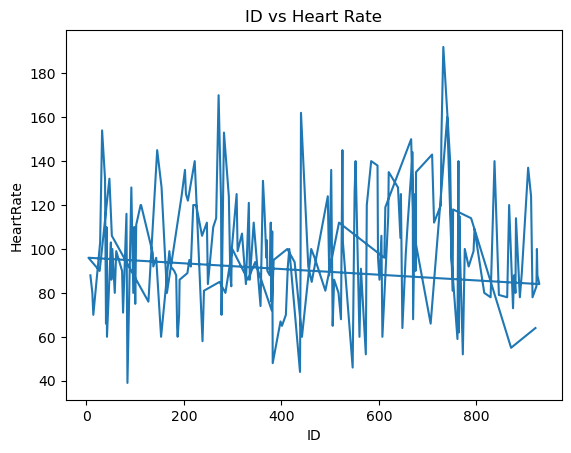

In [32]:
# line plot: variation of scatter plot
plt.plot(df["ID"], df["HeartRate"])
plt.xlabel("ID")
plt.ylabel("HeartRate")
plt.title("ID vs Heart Rate")
plt.show()
# most often used when one of the variables is time, and make sure that one of your variables is sorted


#### One categorical and one continous: side-by-side boxplot

Other choices include side-by-side histogram and side-by-side density plot

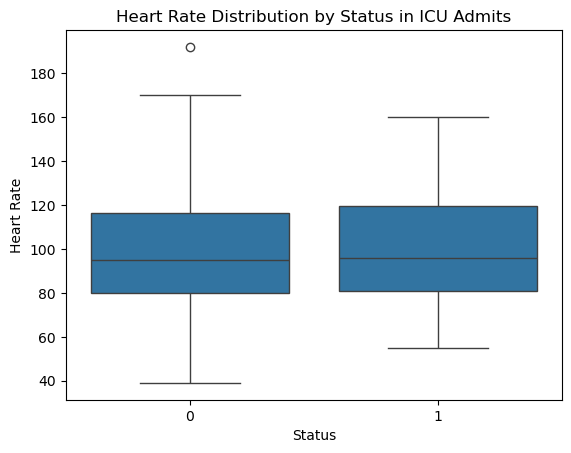

In [34]:
sns.boxplot(x = "Status", y = "HeartRate", data = df)
plt.xlabel("Status")
plt.ylabel("Heart Rate")
plt.title("Heart Rate Distribution by Status in ICU Admits")
plt.show()

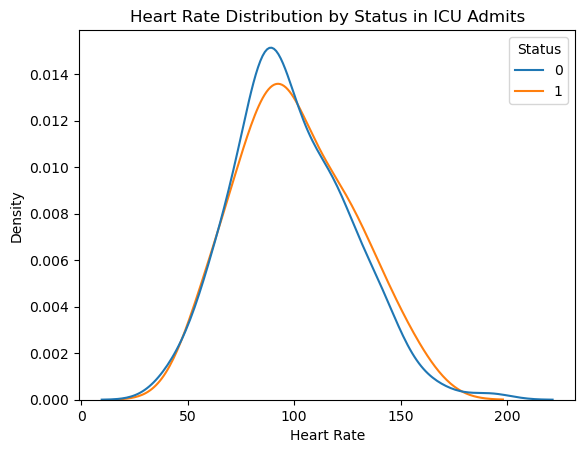

In [35]:
sns.kdeplot(x = "HeartRate", hue = "Status", data = df, common_norm = False)
plt.xlabel("Heart Rate")
plt.ylabel("Density")
plt.title("Heart Rate Distribution by Status in ICU Admits")
plt.show()

##### What to write about a side-by-side boxplot or density plot

- what the plot is about 
- highlight the comparison
- for boxplots, always declare if the box plots overlap or not

boxplot example:
The figure is a side-by-side box plot for heart rate vs status. The boxes are overlapped, so there
might not be significant differences between the two groups on heart rate distribution.

#### Two categorical: side-by-side bar plot

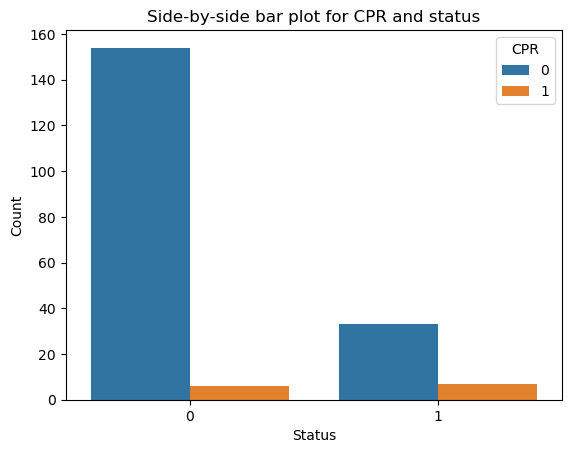

In [71]:
df["CPR"] = df["CPR"].astype("str")

sns.countplot(x = "Status", hue = "CPR", data = df)
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Side-by-side bar plot for CPR and status")
plt.show()

In [83]:
# can normalize all or index, decide which is more reasonable (first shows overall percentage, other is percentage of group B is in group A)
proportion_table_1 = pd.crosstab(df["Status"], df["CPR"], normalize="all")
proportion_table_2 = pd.crosstab(df["Status"], df["CPR"], normalize="index")
# or don't normalize to just get a count table
proportion_table_3 = pd.crosstab(df["Status"], df["CPR"])
print(proportion_table_1)
print(proportion_table_2)
print(proportion_table_3)

CPR         0      1
Status              
0       0.770  0.030
1       0.165  0.035
CPR          0       1
Status                
0       0.9625  0.0375
1       0.8250  0.1750
CPR       0  1
Status        
0       154  6
1        33  7


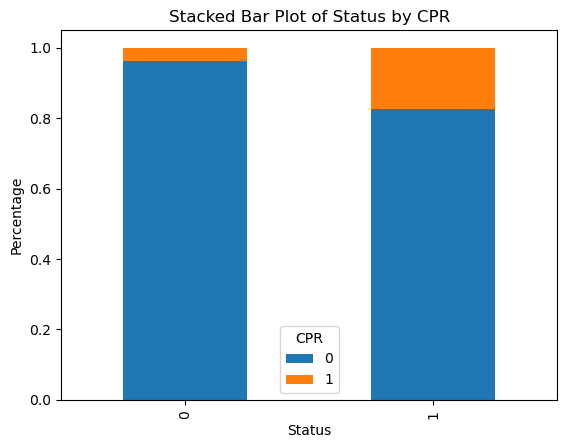

In [93]:
proportion_table_2.plot(kind="bar", stacked=True)
plt.xlabel("Status")
plt.ylabel("Percentage")
plt.title("Stacked Bar Plot of Status by CPR")
plt.show()

##### What to write about a side-by-side bar plot

- what the plot is about
- highlight the comparison

example: The figue is a astacked bar plot for the status vs CPR. The color is indicated whether the patient is using CPR in each group. From the figure, it seems the distribution of CPR use is different for the survival and nonsurvival groups. In the survival group, there are much larger proportion of people not using CPR. Notice that even though CPR is surival are correlated in the figure, it does not mean that one causes the other.

### In-class activities: Try to make data visualizaiton by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [40]:
titanic_data = sns.load_dataset('titanic')
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


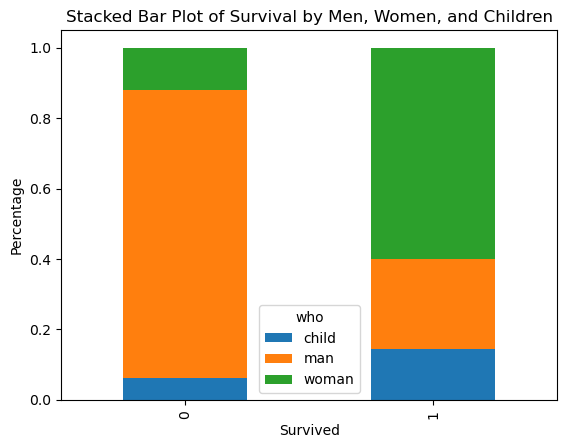

In [97]:
proportion_table = pd.crosstab(titanic_data["survived"], titanic_data["who"], normalize="index")
proportion_table.plot(kind="bar", stacked=True)
plt.xlabel("Survived")
plt.ylabel("Percentage")
plt.title("Stacked Bar Plot of Survival by Men, Women, and Children")
plt.show()

#### Other options

Matplotlib and seaborn also allow you to do some level of customization. 
Read the documents here to change color/size/shape for your plot. Save your work to submit to the quiz later. 

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Conclusion

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot

But, wait, why?

In-class activities: discuss what other options you want to have for your plots?